# Set Environment & Libraries

In [2]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

# Feature engineering
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# Model support functions
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from scipy.stats import uniform


# Model evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#  Load Data

In [3]:
df_1 = pd.read_csv('/Users/songyarong/workspace/5. Project/1. Bank Churn/bank.data.csv')
df_1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#  Data Exploration

##  Understand the Raw Dataset

In [4]:
# Check data info
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Check the unique values for each column
df_1.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
# Get target variable
y = df_1['Exited']

##  Understand the Features

In [7]:
# Check the missing values
df_1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Understand Numerical Features

In [8]:
# CreditScore, Age, Tenure
# Balance, NumOfProducts, EstimatedSalary
df_1[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

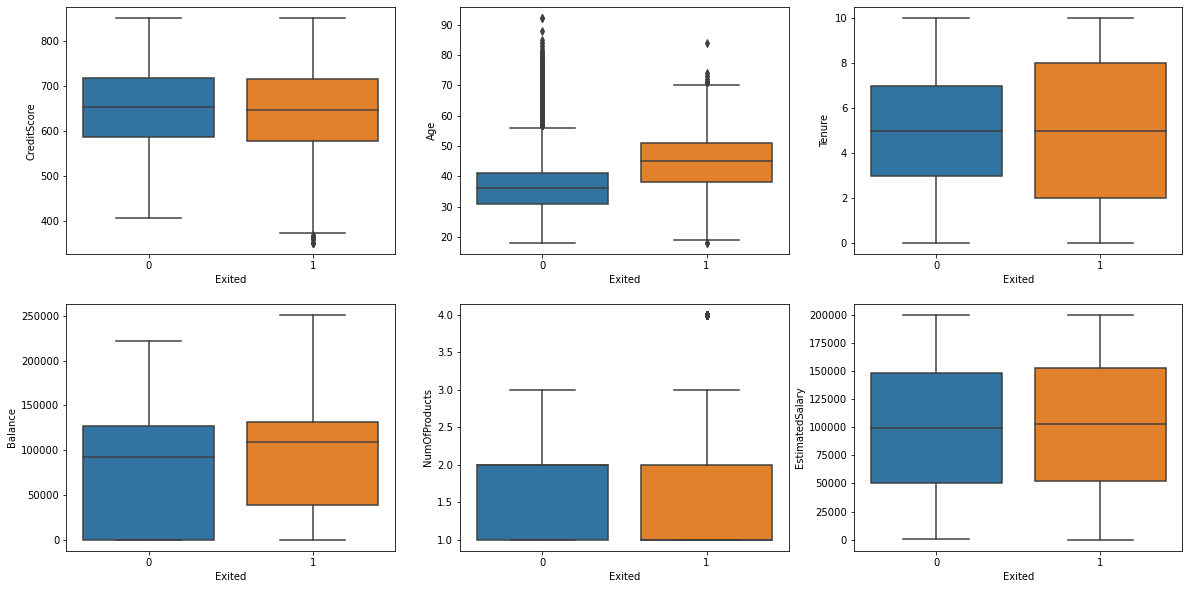

In [9]:
# Check the numeric feature distributon
# Check the outliers
f, axss = plt.subplots(2, 3, figsize=[20, 10])
sns.boxplot(x='Exited', y='CreditScore', data=df_1, ax=axss[0][0])
sns.boxplot(x='Exited', y='Age', data=df_1, ax=axss[0][1])
sns.boxplot(x='Exited', y='Tenure', data=df_1, ax=axss[0][2])
sns.boxplot(x='Exited', y='Balance', data=df_1, ax=axss[1][0])
sns.boxplot(x='Exited', y='NumOfProducts', data=df_1, ax=axss[1][1])
sns.boxplot(x='Exited', y='EstimatedSalary', data=df_1, ax=axss[1][2])

### Understand Categorical Features

<AxesSubplot:xlabel='Exited', ylabel='count'>

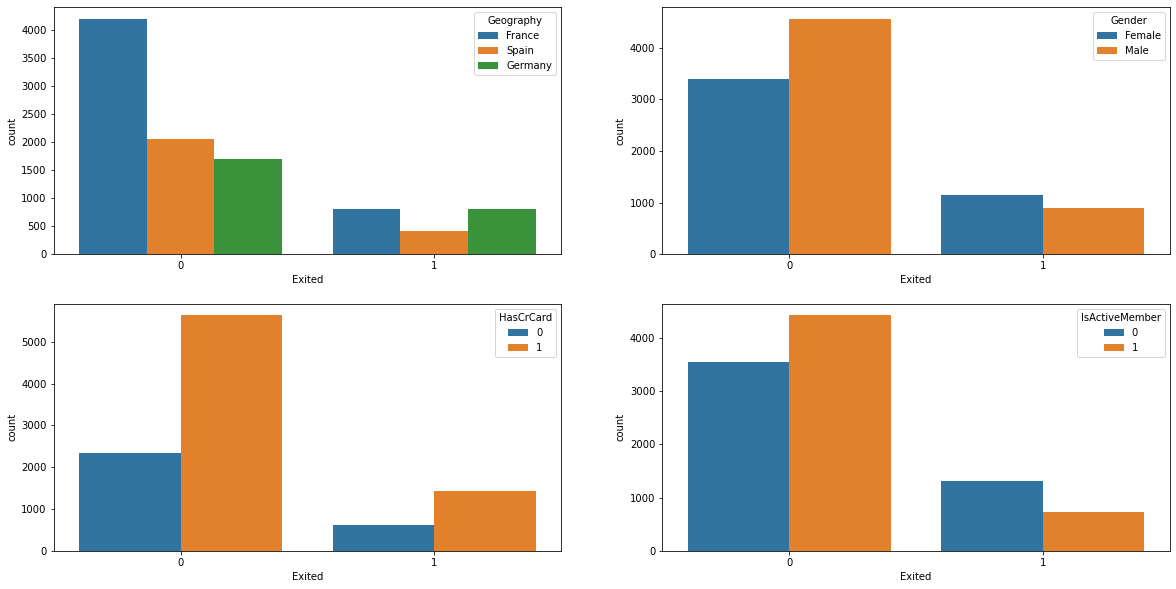

In [10]:
# Geography, Gender
# HasCrCard, IsActiveMember
f, axss = plt.subplots(2, 2, figsize = [20, 10])
sns.countplot(x='Exited', hue='Geography', data=df_1, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=df_1, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=df_1, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=df_1, ax=axss[1][1])

# Feature Engineering

## Drop useless features

In [11]:
# Drop useless features
to_drop = ['RowNumber', 'CustomerId', 'Surname', 'Exited']
X = df_1.drop(to_drop, axis = 1)

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


## Features: numerical & categorical

In [13]:
# Check the data types
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [14]:
# Numerical columns
num_cols = X.columns[(X.dtypes == 'int64')|(X.dtypes == 'float64')]
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [15]:
# Categorical columns
cat_cols = X.columns[X.dtypes == 'object']
cat_cols

Index(['Geography', 'Gender'], dtype='object')

## Train_test_split

In [16]:
# Stratify sampling
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('testing data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')


training data has 7500 observation with 10 features
testing data has 2500 observation with 10 features


In [17]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7971,633,Spain,Male,42,10,0.00,1,0,1,79408.17
9152,708,Germany,Female,23,4,71433.08,1,1,0,103697.57
6732,548,France,Female,37,9,0.00,2,0,0,98029.58
902,645,France,Female,48,7,90612.34,1,1,1,149139.13
2996,729,Spain,Female,45,7,91091.06,2,1,0,71133.12


## One hot encoding

In [18]:
categories = ['Geography']
enc_ohe = OneHotEncoder()
# enc_ohe.fit(X_train[categories])


def OneHotEncoding(df, enc, categories):
    transformed = pd.DataFrame(enc.fit_transform(df[categories]).toarray(), columns = enc.get_feature_names(categories))
    return pd.concat([df.reset_index(drop=True), transformed], axis = 1).drop('Geography', axis=1)

In [19]:
X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [20]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,Male,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,Female,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,Female,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,Female,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,Female,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [21]:
X_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,767,Female,44,2,152509.25,1,1,1,136915.15,1.0,0.0,0.0
1,662,Male,37,5,94901.09,1,1,1,48233.75,0.0,0.0,1.0
2,710,Male,37,6,135795.63,1,0,1,46523.60,0.0,1.0,0.0
3,621,Male,50,3,163085.79,1,0,1,131048.36,0.0,0.0,1.0
4,515,Male,45,7,120961.50,3,1,1,39288.11,0.0,1.0,0.0


## Ordinal encoding

In [22]:
categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [23]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,1.0,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,0.0,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,0.0,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,0.0,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,0.0,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [24]:
X_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,767,0.0,44,2,152509.25,1,1,1,136915.15,1.0,0.0,0.0
1,662,1.0,37,5,94901.09,1,1,1,48233.75,0.0,0.0,1.0
2,710,1.0,37,6,135795.63,1,0,1,46523.60,0.0,1.0,0.0
3,621,1.0,50,3,163085.79,1,0,1,131048.36,0.0,0.0,1.0
4,515,1.0,45,7,120961.50,3,1,1,39288.11,0.0,1.0,0.0


## Standardize/Normalize data

In [25]:
# Scale the data, using standardization
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [26]:
# Check the train data before modelling
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.172985,1.0,0.289202,1.731199,-1.218916,-0.912769,-1.542199,0.968496,-0.352044,0.0,0.0,1.0
1,0.602407,0.0,-1.509319,-0.341156,-0.076977,-0.912769,0.648425,-1.032529,0.072315,0.0,1.0,0.0
2,-1.051762,0.0,-0.184093,1.385806,-1.218916,0.796109,-1.542199,-1.032529,-0.026711,1.0,0.0,0.0
3,-0.048922,0.0,0.857156,0.695022,0.229625,-0.912769,0.648425,0.968496,0.866221,1.0,0.0,0.0
4,0.819517,0.0,0.573179,0.695022,0.237278,0.796109,0.648425,-1.032529,-0.496617,0.0,0.0,1.0


# Model Training 

## General rough modelling 

In [27]:
# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [28]:
# Rough model example using Logistic Regression
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Prediction of the test data
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
# Accuracy of the test data (accuracy; score will use X_test to make prediction first)
classifier_logistic.score(X_test, y_test)

0.8088

In [31]:
# Use 5-fold Cross Validation to roughly compare the accuracy for different models
models = ['Logistic Regression', 'KNN', 'Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + models[count] + ' is ' + str(cv_score.mean()))
    count += 1
    

[0.81933333 0.80666667 0.80666667 0.80933333 0.82      ]
Model accuracy of Logistic Regression is 0.8124
[0.84133333 0.84066667 0.83       0.83066667 0.84      ]
Model accuracy of KNN is 0.8365333333333334
[0.88066667 0.85866667 0.85533333 0.85933333 0.86666667]
Model accuracy of Random Forest is 0.8641333333333334


## Use Grid Search to Find Optimal Hyperparameters

### UDF: Helper function for printing out grid search results

In [32]:
# Helper function for printing out grid search results
def print_grid_search_metrics(gs):
    print("Best score: " + str(gs.best_score_))        # best_score_
    print("Best parameter set:")
    best_parameters = gs.best_params_                  # best_parameters
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

### Find Optimal Hyperparameters - LogisticRegression

In [33]:
# Loss/cost function --> (wx + b - y) ^2 + ƛ * |w| --> ƛ is a hyperparameter
# Penalty is choosed from L1 or L2
# C is the 1/lambda

# ('l1', 0.01)('l1', 0.05) ('l1', 0.1) ('l1', 0.2)('l1', 1)
# ('12', 0.01)('l2', 0.05) ('l2', 0.1) ('l2', 0.2)('l2', 1)

# parameters in the form of Dictionary

parameters = {'penalty':('l1', 'l2'), 'C':(0.01, 0.05, 0.1, 0.2, 1)}
Grid_LR = GridSearchCV(LogisticRegression(solver= 'liblinear'), parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l1', 'l2')})

In [34]:
print_grid_search_metrics(Grid_LR)

Best score: 0.8125333333333333
Best parameter set:
C:1
penalty:l1


In [35]:
# best linear regression model
best_LR_model = Grid_LR.best_estimator_           # best_estimator_
best_LR_model

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [36]:
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
best_LR_model.score(X_test, y_test)

0.8092

In [38]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)      # cv_results
LR_models

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006897,0.000341,0.001025,0.000167,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.804667,0.792667,0.794000,0.800667,0.806000,0.799600,0.005426,10
1,0.005544,0.000346,0.000801,0.000015,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.818667,0.805333,0.806667,0.807333,0.816000,0.810800,0.005439,9
2,0.008444,0.001743,0.000831,0.000055,0.05,l1,"{'C': 0.05, 'penalty': 'l1'}",0.819333,0.806000,0.804000,0.808667,0.816667,0.810933,0.006016,8
3,0.005915,0.000088,0.000795,0.000017,0.05,l2,"{'C': 0.05, 'penalty': 'l2'}",0.820667,0.806667,0.806000,0.809333,0.818667,0.812267,0.006177,5
4,0.010957,0.001280,0.000823,0.000030,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.820667,0.806667,0.807333,0.808000,0.819333,0.812400,0.006234,2
5,0.005879,0.000033,0.000792,0.000017,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.820000,0.806667,0.806667,0.810000,0.818000,0.812267,0.005666,6
6,0.009999,0.003786,0.000794,0.000010,0.2,l1,"{'C': 0.2, 'penalty': 'l1'}",0.820000,0.808000,0.806000,0.808000,0.820000,0.812400,0.006248,2
7,0.005866,0.000013,0.000784,0.000016,0.2,l2,"{'C': 0.2, 'penalty': 'l2'}",0.820000,0.806000,0.806667,0.809333,0.818000,0.812000,0.005858,7
8,0.036799,0.017461,0.000831,0.000034,1,l1,"{'C': 1, 'penalty': 'l1'}",0.820667,0.806667,0.806667,0.809333,0.819333,0.812533,0.006188,1
9,0.005886,0.000052,0.000772,0.000006,1,l2,"{'C': 1, 'penalty': 'l2'}",0.819333,0.806667,0.806667,0.809333,0.820000,0.812400,0.006016,2


In [39]:
# Reshape DataFrame organized by given index/column values (pivot)
res = LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
res

param_C,0.01,0.05,0.10,0.20,1.00
param_penalty,,,,,
l1,0.7996,0.810933,0.812400,0.8124,0.812533
l2,0.8108,0.812267,0.812267,0.8120,0.812400


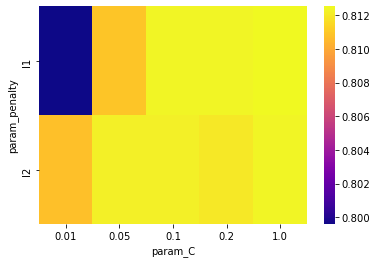

In [40]:
_ = sns.heatmap(res, cmap='plasma')

### Find Optimal Hyperparameters - KNN

In [41]:
# Choose k
parameters = {'n_neighbors':[1,3,5,7,9]}
Grid_KNN = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [42]:
# Best number of neighbors
print_grid_search_metrics(Grid_KNN)

Best score: 0.8433333333333334
Best parameter set:
n_neighbors:9


In [43]:
# Best KNN
best_KNN_model = Grid_KNN.best_estimator_
best_KNN_model

KNeighborsClassifier(n_neighbors=9)

In [44]:
best_KNN_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
best_KNN_model.score(X_test, y_test)

0.8428

In [46]:
KNN_models = pd.DataFrame(Grid_KNN.cv_results_)      # cv_results
KNN_models

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005127,0.000256,0.048290,0.001083,1,{'n_neighbors': 1},0.805333,0.810000,0.780667,0.796000,0.808,0.800000,0.010791,5
1,0.004963,0.000071,0.060859,0.000736,3,{'n_neighbors': 3},0.838000,0.821333,0.821333,0.817333,0.834,0.826400,0.008073,4
2,0.005034,0.000079,0.068227,0.000831,5,{'n_neighbors': 5},0.841333,0.840667,0.830000,0.830667,0.840,0.836533,0.005084,3
3,0.005103,0.000158,0.073003,0.000873,7,{'n_neighbors': 7},0.849333,0.842667,0.839333,0.832667,0.850,0.842800,0.006469,2
4,0.005342,0.000060,0.077881,0.001236,9,{'n_neighbors': 9},0.845333,0.849333,0.836667,0.835333,0.850,0.843333,0.006211,1


### Find Optimal Hyperparameters -Random Forest


In [47]:
# Choose the number of trees
parameters = {'n_estimators':[60,80,100], 'max_depth':[1,5,10]}
Grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [48]:
# Best number of trees and max-depth
print_grid_search_metrics(Grid_RF)

Best score: 0.8661333333333333
Best parameter set:
max_depth:10
n_estimators:100


In [49]:
RF_models = pd.DataFrame(Grid_RF.cv_results_)      # cv_results
RF_models

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.080509,0.001541,0.006078,0.000339,1,60,"{'max_depth': 1, 'n_estimators': 60}",0.796667,0.796667,0.796000,0.800000,0.796000,0.797067,0.001497,7
1,0.115477,0.002767,0.007919,0.000463,1,80,"{'max_depth': 1, 'n_estimators': 80}",0.796667,0.796667,0.796000,0.796000,0.796000,0.796267,0.000327,8
2,0.136755,0.004703,0.008911,0.000291,1,100,"{'max_depth': 1, 'n_estimators': 100}",0.796667,0.796667,0.796000,0.796000,0.796000,0.796267,0.000327,8
3,0.164530,0.006234,0.008174,0.000223,5,60,"{'max_depth': 5, 'n_estimators': 60}",0.860667,0.842667,0.842000,0.844667,0.845333,0.847067,0.006910,5
4,0.211631,0.002922,0.011233,0.000871,5,80,"{'max_depth': 5, 'n_estimators': 80}",0.863333,0.836667,0.842667,0.851333,0.848667,0.848533,0.008968,4
5,0.251275,0.005049,0.012244,0.000329,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.852667,0.843333,0.844000,0.843333,0.847333,0.846133,0.003588,6
6,0.232187,0.002070,0.011810,0.001218,10,60,"{'max_depth': 10, 'n_estimators': 60}",0.880667,0.859333,0.852000,0.862000,0.864667,0.863733,0.009462,2
7,0.310861,0.004112,0.014640,0.000161,10,80,"{'max_depth': 10, 'n_estimators': 80}",0.876000,0.858667,0.855333,0.860667,0.867333,0.863600,0.007335,3
8,0.383033,0.006305,0.017803,0.000185,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.878667,0.864667,0.862000,0.859333,0.866000,0.866133,0.006672,1


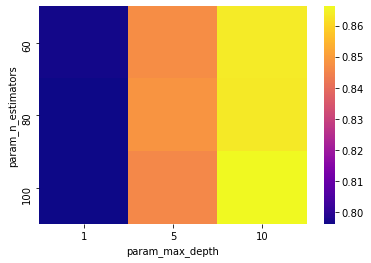

In [50]:
res = RF_models.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_score')
_ = sns.heatmap(res, cmap='plasma')

In [51]:
# Best random forest
best_RF_model = Grid_RF.best_estimator_
best_RF_model

RandomForestClassifier(max_depth=10)

# Model Evaluation 

## Confusion matrix

In [52]:
# Confusion matrix for LR, KNN, RF
confusion_matrices = [
    ('Logistic Regression', confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ('K Nearest Neighbor', confusion_matrix(y_test, best_KNN_model.predict(X_test))),
    ('Random Forest', confusion_matrix(y_test, best_RF_model.predict(X_test)))
]

In [53]:
# UDF: print out confusion matrices
def draw_confusion_matrices(confusion_matrices):
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

#UDF: calculate accuracy, precision, recall, F1 score
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy = (tn + tp)/(tn + fn + tp + fp + 0.0)
    precision = tp/(tp + fp + 0.0)
    recall = tp/(tp + fn + 0.0)
    f1 = 2/(1/recall + 1/precision + 0.0)
    print(classifier)
    print('Accuracy is: ' + str(accuracy))
    print('Precision is: ' + str(precision))
    print('Recall is: ' + str(recall))
    print('F1 score is: ' + str(f1))
    print()
    

In [54]:
draw_confusion_matrices(confusion_matrices)

Logistic Regression
Accuracy is: 0.8092
Precision is: 0.5963855421686747
Recall is: 0.1944990176817289
F1 score is: 0.29333333333333333

K Nearest Neighbor
Accuracy is: 0.8428
Precision is: 0.7283464566929134
Recall is: 0.36345776031434185
F1 score is: 0.4849279161205767

Random Forest
Accuracy is: 0.8584
Precision is: 0.7924528301886793
Recall is: 0.412573673870334
F1 score is: 0.5426356589147288



## ROC &AUC

### ROC of Logistic Regressio Model

In [55]:
# Use predict_proba to get the probability results of LR
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]     # predicted positive
y_pred_lr

array([0.17565369, 0.06827935, 0.14477321, ..., 0.28552056, 0.10722177,
       0.14437027])

In [56]:
# Calculate false positive rate, true positive rate
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

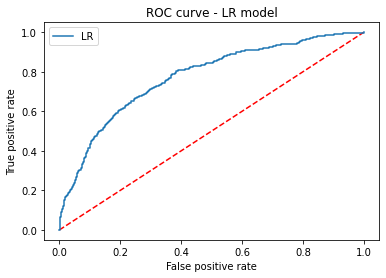

In [57]:
# ROC curve
plt.figure(1)
plt.plot([0,1], [0,1], 'r--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR model')
plt.legend()
plt.show()

In [58]:
# AUC score
metrics.auc(fpr_lr, tpr_lr)

0.7722097177968835

### ROC of K Nearset Neighbor Model

In [59]:
# Use predict_proba to get the probability results of LR
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]     # predicted positive
y_pred_knn

array([0.        , 0.        , 0.11111111, ..., 0.22222222, 0.        ,
       0.        ])

In [60]:
# Calculate false positive rate, true positive rate
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

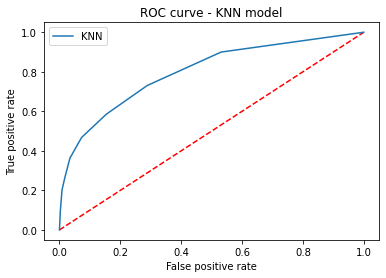

In [61]:
# ROC curve
plt.figure(1)
plt.plot([0,1], [0,1], 'r--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN model')
plt.legend()
plt.show()

In [62]:
# AUC score
metrics.auc(fpr_knn, tpr_knn)

0.7986385690420251

### ROC of Random Forest Model

In [63]:
# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]     # predicted positive
y_pred_rf

array([0.23560851, 0.06224226, 0.26273419, ..., 0.13301699, 0.06641476,
       0.10938116])

In [64]:
# Calculate false positive rate, true positive rate
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

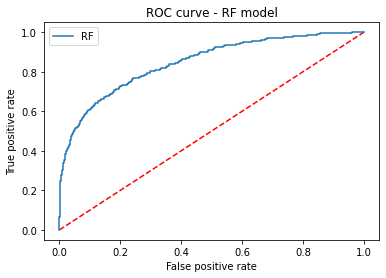

In [65]:
# ROC curve
plt.figure(1)
plt.plot([0,1], [0,1], 'r--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend()
plt.show()

In [66]:
# AUC score
metrics.auc(fpr_rf, tpr_rf)

0.8470573375869211

### Comparsion

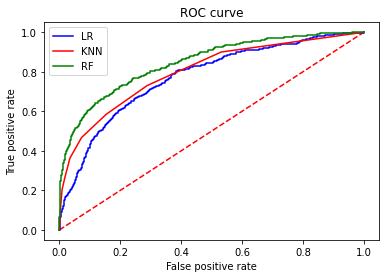

In [67]:
plt.figure(1)
plt.plot([0,1], [0,1], 'r--')
plt.plot(fpr_lr, tpr_lr, 'b',label='LR')
plt.plot(fpr_knn, tpr_knn, 'r', label='KNN')
plt.plot(fpr_rf, tpr_rf, 'g', label='RF')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

### Random Forest - Feature Importance

In [68]:
# check feature importance of random forest for feature selection
importances = best_RF_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X_train.shape[1]):
    print ("{0} : {1}".format(X_train.columns[indices[ind]],round(importances[indices[ind]], 4)))
    

Feature importance ranking by Random Forest Model:
Age : 0.3075
NumOfProducts : 0.2287
Balance : 0.106
CreditScore : 0.084
EstimatedSalary : 0.0831
IsActiveMember : 0.0573
Tenure : 0.0449
Geography_Germany : 0.0386
Gender : 0.0181
Geography_France : 0.0114
Geography_Spain : 0.0112
HasCrCard : 0.0093
